# London Weather Analysis - Data Viz Week 2  - Core 2.1

## Run Imports and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (12,3)

url ="London_Weather_Data/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


## Begin Data Cleansing

### Convert Date column to DateTime

In [2]:
# Converting the Date column to a DateTime type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### Set DateTime as index

In [3]:
#Establish new dateTime column as Index

df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [4]:
#Verify index creation
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [5]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

,Column,dtype,# null,null %,nunique,min,max
0,cloud_cover,float64,403,2.626947,10,0.0,9.0
1,sunshine,float64,384,2.503096,160,0.0,16.0
2,global_radiation,float64,402,2.620429,358,12.0,402.0
3,max_temp,float64,390,2.542207,374,-6.2,37.9
4,mean_temp,float64,419,2.731243,321,-7.6,29.0
5,min_temp,float64,386,2.516133,296,-11.8,22.3
6,precipitation,float64,390,2.542207,260,0.0,61.8
7,pressure,float64,388,2.529170,641,95960.0,104820.0
8,snow_depth,float64,1752,11.420377,19,0.0,22.0


### Keep Only Data from years >=2000 & keep only the following features:
precipitation, 
mean_temp, 
min_temp, 
max_temp, 
snow_depth

In [6]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


### Impute any Missing Values

In [7]:
# We got a look at missing values in the EDA function above, but let's recheck our counts:

df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

Before imputing values, we need to consider the most appropriate method.

I see two distinct categories present:

mean_temp, min_temp, and max_temp which should all follow an interpolation method as temperatures gradually adjust instead of large stochastic swings between values.

Alternately, the precipitation and snow_depth values are likely optimized by filling with 0.  The rationale being if either of these values is measurable, the value would be non-zero; else it would be reasonably an unmeasurable (0) value.

I will be applying these methods.

In [8]:
# Adjust missing temp values with interpolation
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()


In [9]:
# Verify no remaining null values in temp features:

df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [10]:
# Eliminate null values in preciptation & snow features by filling with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
# Verify no remaining null values in precipitation and snow features:

df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

So far we have converted the date category to DateTime type, assigned it as our index, eliminated the features that we did not need (cloud_cover, sunshine, global_radiation, and pressure),and removed any null values from remaining features.  We are ready to begin answering questions about our data.

## Answer Questions about data

### Q1: What month had the most precipitation between 2000 through 2010

In [12]:
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [13]:
# Create a temporary dataframe .

precip_df = df.loc['2000':'2010', 'precipitation'].copy()

precip_df

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [14]:
%conda list

# packages in environment at C:\Users\staichn\Anaconda3\envs\dojo-env:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    conda-forge
_tflow_select             2.3.0                       mkl  
abseil-cpp                20211102.0           h7e5c4e1_2    conda-forge
absl-py                   1.3.0              pyhd8ed1ab_0    conda-forge
aiohttp                   3.8.3            py39ha55989b_1    conda-forge
aiosignal                 1.2.0              pyhd8ed1ab_0    conda-forge
anyio                     3.5.0            py39hcbf5309_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39ha55989b_3    conda-forge
arrow                     1.2.3              pyhd8ed1ab_0    conda-forge
asttokens                 2.0.5              pyhd8ed1ab_0    conda-forge
astunparse                1.6.3              pyhd8ed1ab_0    conda-for

In [15]:
precip_mth = precip_df.resample('M').mean()
precip_mth.name = "Monthly Precipitation Resampled"
precip_mth.head()



date
2000-01-31    0.461290
2000-02-29    2.144828
2000-03-31    0.432258
2000-04-30    2.393333
2000-05-31    2.206452
Freq: M, Name: Monthly Precipitation Resampled, dtype: float64

In [16]:
precip_mth.tail()

date
2010-08-31    2.703226
2010-09-30    1.266667
2010-10-31    1.967742
2010-11-30    0.733333
2010-12-31    0.683871
Freq: M, Name: Monthly Precipitation Resampled, dtype: float64

In [29]:
precip_mth.sort_index()

date
2000-01-31    0.461290
2000-02-29    2.144828
2000-03-31    0.432258
2000-04-30    2.393333
2000-05-31    2.206452
                ...   
2010-08-31    2.703226
2010-09-30    1.266667
2010-10-31    1.967742
2010-11-30    0.733333
2010-12-31    0.683871
Freq: M, Name: Monthly Precipitation Resampled, Length: 132, dtype: float64

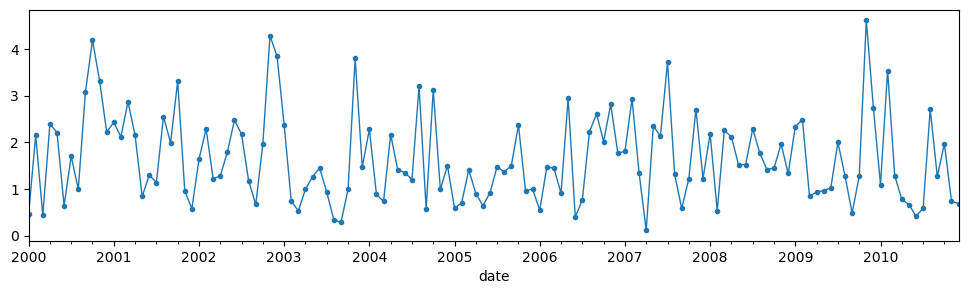

In [17]:
ax = precip_mth.plot(style='.-', lw=1)

(<Figure size 1200x400 with 1 Axes>, <AxesSubplot: >)

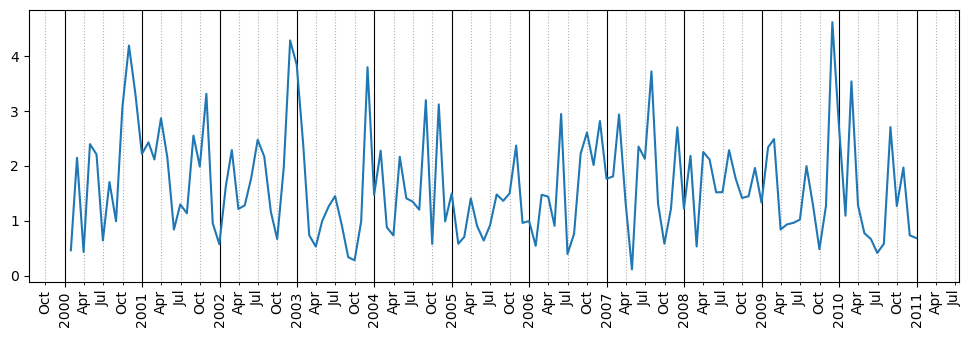

In [31]:
def plot_dates(precip_mth,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first

    if title is None:
        title = precip_mth.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(precip_mth.index, precip_mth.values);

    
   # precip_mth.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
#     ax.set_xticks(ax.get_xticks())
#     ax.set_xticklabels(ax.get_xticklabels(), 
#                       fontsize=xtick_fontsize, 
#                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    fig.autofmt_xdate(which='minor',rotation=90,ha='center')
    return fig,ax

plot_dates(precip_mth)

(<Figure size 1200x400 with 1 Axes>, <AxesSubplot: >)

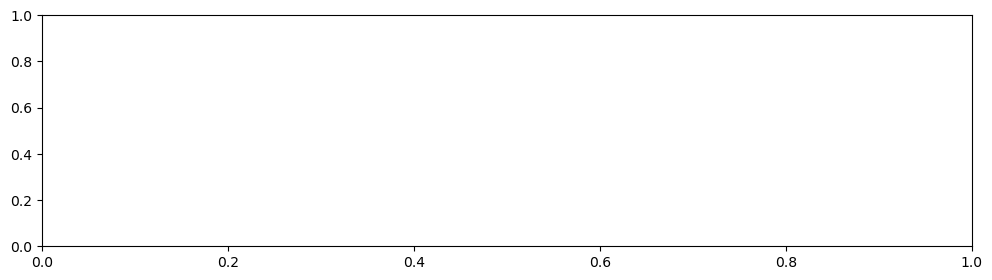

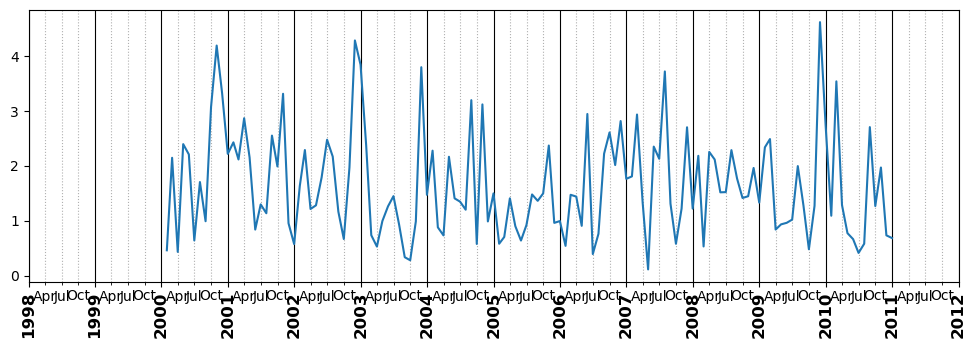

In [19]:
fig, ax = plt.subplots(figsize=(12,3))
#precip_mth.plot(ax=ax)
plot_dates(precip_mth)

In [20]:
#Double check precip_mth to ensure that it is set up correctly...
#Confirmed it is from 1/2000 to 12/2010...
#something is wrong with the visualization setup...It appears James called out the bug and I missed it.
precip_mth

date
2000-01-31    0.461290
2000-02-29    2.144828
2000-03-31    0.432258
2000-04-30    2.393333
2000-05-31    2.206452
                ...   
2010-08-31    2.703226
2010-09-30    1.266667
2010-10-31    1.967742
2010-11-30    0.733333
2010-12-31    0.683871
Freq: M, Name: Monthly Precipitation Resampled, Length: 132, dtype: float64

In [21]:
# Confirming the precip max empirically via data and not viz
precip_mth.idxmax()

Timestamp('2009-11-30 00:00:00', freq='M')

## Q2 Max Temp


In [22]:
df


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [23]:
# Create a temporary dataframe .

max_temp_df = df.loc['2000':'2020', ['mean_temp']].copy()

max_temp_df

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [24]:
# Resample the data Resample the data
max_temp_yr = max_temp_df.resample('A').mean()
max_temp_yr.name = "Annual Temperatures Resampled"
max_temp_yr.head()

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683


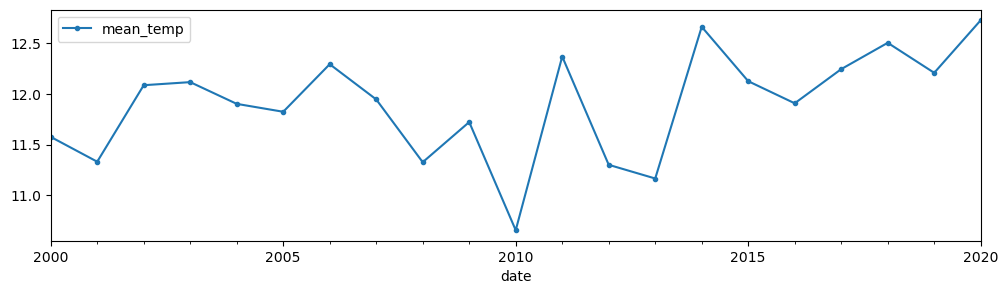

In [25]:
ax = max_temp_yr.plot(style='.-')


In [26]:
max_temp_yr.idxmax()

mean_temp   2020-12-31
dtype: datetime64[ns]

C:\Users\staichn\AppData\Local\Temp\ipykernel_28716\2489491864.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


(<Figure size 1200x400 with 1 Axes>, <AxesSubplot: >)

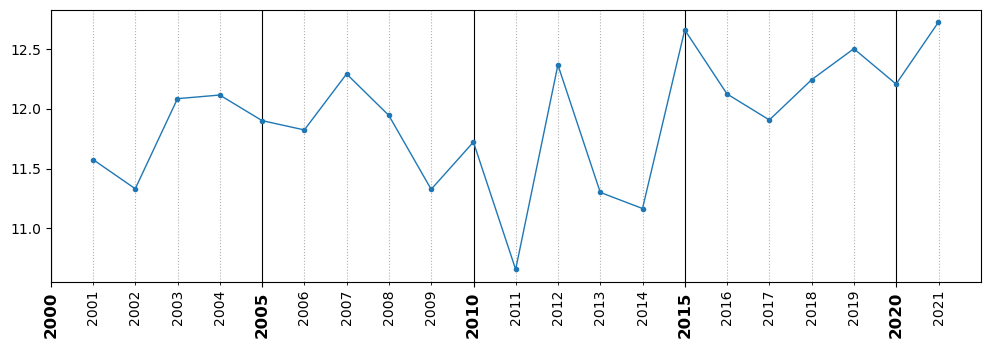

In [44]:
#fig, ax = plt.subplots(figsize=(12,3))
#max_temp_yr.plot(ax=ax)

def plot_dates(max_temp_yr,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first

    if title is None:
        title = max_temp_yr.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(max_temp_yr.index, max_temp_yr.values, marker='.', lw=1);
    #max_temp_yr.plot(ax=ax,title=title, style='.-');
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every year.
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    ## for major year ticks
    loc_5year = mdates.YearLocator(5)
    fmt_5year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
#     ax.set_xticks(ax.get_xticks())
#     ax.set_xticklabels(ax.get_xticklabels(), 
#                        fontsize=xtick_fontsize, 
#                        fontweight=xtick_fontweight) 
    
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_year)
    ax.xaxis.set_minor_formatter(fmt_year)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_5year)
    ax.xaxis.set_major_formatter(fmt_5year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    
     ## Change the font of the major ticks to stand out
#     ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 

    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    fig.autofmt_xdate(which='minor',rotation=90,ha='center')
    return fig,ax

plot_dates(max_temp_yr)

(<Figure size 1200x400 with 1 Axes>,
 <AxesSubplot: title={'center': 'Annual Temperatures Resampled'}, xlabel='date'>)

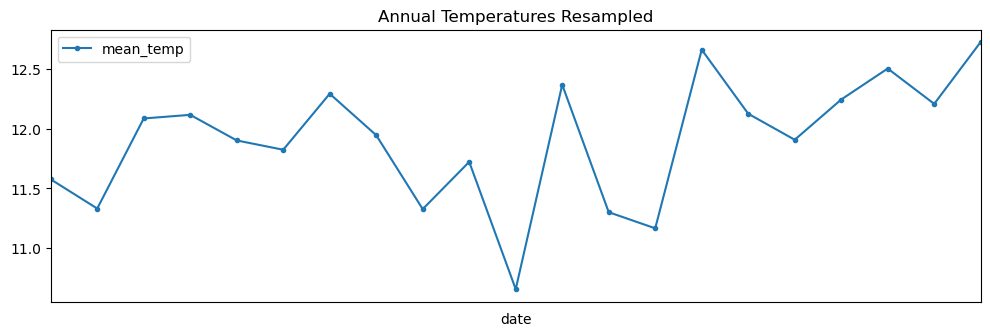

In [33]:
#fig, ax = plt.subplots(figsize=(12,3))
plot_dates(max_temp_yr)

In [ ]:
#Break***Break***